In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Datos_limpios_Mex.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   26582 non-null  int64  
 1   last_scraped                 26582 non-null  object 
 2   name                         26582 non-null  object 
 3   description                  26582 non-null  object 
 4   neighborhood_overview        26582 non-null  object 
 5   host_location                26582 non-null  object 
 6   host_response_time           26582 non-null  object 
 7   host_response_rate           26582 non-null  object 
 8   host_acceptance_rate         26582 non-null  object 
 9   host_is_superhost            26582 non-null  object 
 10  host_verifications           26582 non-null  object 
 11  host_has_profile_pic         26582 non-null  object 
 12  host_identity_verified       26582 non-null  object 
 13  neighbourhood   

In [4]:
dff=df
dff['room_type'] = dff['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})


In [5]:
df1 = dff[dff["room_type"] ==4]

In [6]:
import re
df1['price']= df1['price'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

C:\Users\lapep\AppData\Local\Temp\ipykernel_21912\2313346897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price']= df1['price'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)


In [7]:
df1=df1[df1['price'] <40000]

In [8]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_acceptance_rate'] != 'Without information']
df1 = df1[df1['review_scores_cleanliness'] != 'Nothing']
Y= df1['price']
X1= df1['room_type'].to_frame()

In [9]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [10]:
type(model)

sklearn.linear_model._base.LinearRegression

In [11]:
model.fit(X=X1, y=Y)

LinearRegression()

In [12]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(2851.2368421052633)}

In [13]:
#Predicciones
y_pred= model.predict(X=X1)
y_pred

array([2851.23684211, 2851.23684211, 2851.23684211, 2851.23684211,
       2851.23684211, 2851.23684211, 2851.23684211, 2851.23684211,
       2851.23684211, 2851.23684211, 2851.23684211, 2851.23684211,
       2851.23684211, 2851.23684211, 2851.23684211, 2851.23684211,
       2851.23684211, 2851.23684211, 2851.23684211, 2851.23684211,
       2851.23684211, 2851.23684211, 2851.23684211, 2851.23684211,
       2851.23684211, 2851.23684211, 2851.23684211, 2851.23684211,
       2851.23684211, 2851.23684211, 2851.23684211, 2851.23684211,
       2851.23684211, 2851.23684211, 2851.23684211, 2851.23684211,
       2851.23684211, 2851.23684211])

<Axes: xlabel='room_type', ylabel='price'>

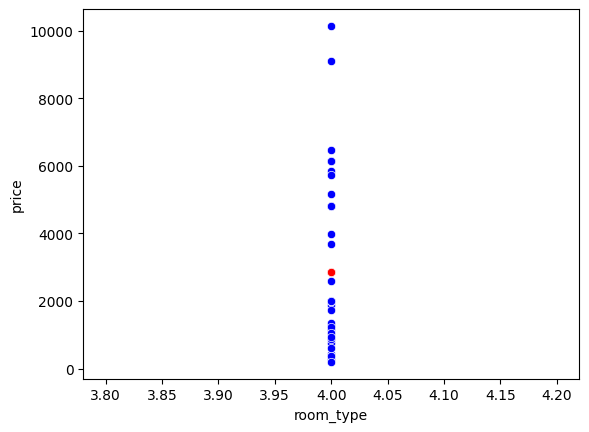

In [14]:
sns.scatterplot(x='room_type', y='price', color="blue", data=df1)
sns.scatterplot(x='room_type', y=y_pred, color="red", data=df1)

In [15]:
coef_Deter= model.score(X=X1, y=Y)
coef_Deter

0.0

In [16]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0)

In [17]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_acceptance_rate'] != 'Without information']
Y2= df1['price']
X2= df1['host_acceptance_rate'].to_frame()

In [18]:
from sklearn.linear_model import LinearRegression
model2= LinearRegression()
type(model2)

sklearn.linear_model._base.LinearRegression

In [19]:
X2 = X2.replace({'%': ''}, regex=True).astype(float)

In [20]:
model2.fit(X=X2, y=Y2)

LinearRegression()

In [21]:
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-66.65739706]),
 'rank_': 1,
 'singular_': array([103.53196811]),
 'intercept_': np.float64(9034.587490824098)}

In [22]:
#Limpiar valores
import re
df1['host_acceptance_rate']= df1['host_acceptance_rate'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [23]:
#Predicciones
y_pred2= model2.predict(X=X2)
y_pred2

array([2835.44956385, 3102.07915211, 3102.07915211, 3102.07915211,
       3102.07915211, 2502.16257853, 6968.20818183, 2635.47737266,
       2502.16257853, 6968.20818183, 2368.8477844 , 2368.8477844 ,
       2435.50518147, 2568.8199756 , 2368.8477844 , 2435.50518147,
       2568.8199756 , 2368.8477844 , 2368.8477844 , 2835.44956385,
       2568.8199756 , 2368.8477844 , 2368.8477844 , 2835.44956385,
       2368.8477844 , 2368.8477844 , 2368.8477844 , 2368.8477844 ,
       2368.8477844 , 2368.8477844 , 2368.8477844 , 2368.8477844 ,
       2368.8477844 , 2435.50518147, 5701.71763761, 2368.8477844 ,
       2435.50518147, 2435.50518147])

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

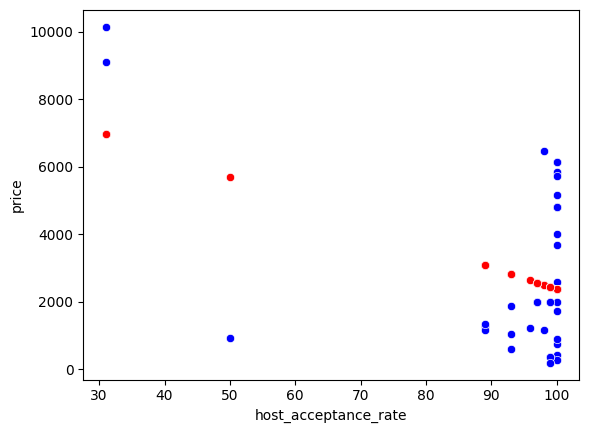

In [24]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df1)
sns.scatterplot(x='host_acceptance_rate', y=y_pred2, color="red", data=df1)

In [25]:
coef_Deter2= model2.score(X=X2, y=Y2)
coef_Deter2

0.20056022244055427

In [26]:
coef_Correl2= np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.44783950522542587)

In [27]:
df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})

C:\Users\lapep\AppData\Local\Temp\ipykernel_21912\4038004741.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})


In [28]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_is_superhost'] != 'Without information']
Y3= df1['price']
X3= df1['host_is_superhost'].to_frame()

In [29]:
from sklearn.linear_model import LinearRegression
model3= LinearRegression()
type(model3)

sklearn.linear_model._base.LinearRegression

In [30]:
model3.fit(X=X3, y=Y3)

LinearRegression()

In [31]:
#Predicciones
y_pred3= model3.predict(X=X3)
y_pred3

array([1830.85714286, 1830.85714286, 3446.45833333, 3446.45833333,
       3446.45833333, 3446.45833333, 3446.45833333, 3446.45833333,
       1830.85714286, 3446.45833333, 1830.85714286, 3446.45833333,
       1830.85714286, 1830.85714286, 1830.85714286, 1830.85714286,
       1830.85714286, 3446.45833333, 1830.85714286, 3446.45833333,
       1830.85714286, 3446.45833333, 3446.45833333, 3446.45833333,
       3446.45833333, 3446.45833333, 3446.45833333, 3446.45833333,
       3446.45833333, 3446.45833333, 3446.45833333, 3446.45833333,
       3446.45833333, 1830.85714286, 3446.45833333, 1830.85714286,
       1830.85714286, 3446.45833333])

<Axes: xlabel='host_is_superhost', ylabel='price'>

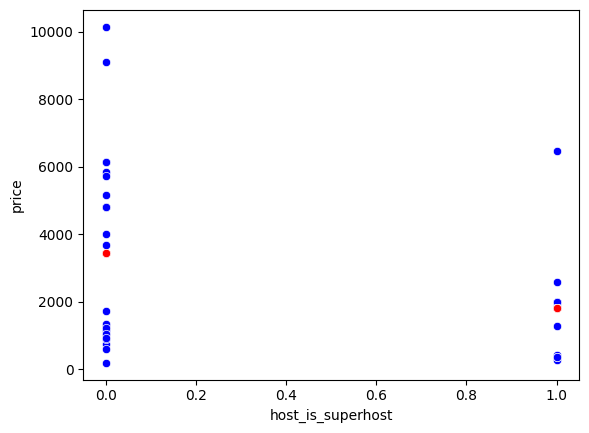

In [32]:
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df1)
sns.scatterplot(x='host_is_superhost', y=y_pred3, color="red", data=df1)

In [33]:
coef_Deter3= model3.score(X=X3, y=Y3)
coef_Deter3

0.09719035562917022

In [34]:
coef_Correl3= np.sqrt(coef_Deter3)
coef_Correl3

np.float64(0.31175367781177854)

In [49]:
#df1 = df1[df1['accommodates'] != 'Does not say']
#df1 = df1[df1['bathrooms'] != 'Without information']
Y4= df1['accommodates']
X4= df1['bathrooms'].to_frame()
X4 = np.round(X4).astype(int)
df1['bathrooms'] = df1['bathrooms'].round().astype(int)


In [50]:
from sklearn.linear_model import LinearRegression
model4= LinearRegression()
type(model4)

sklearn.linear_model._base.LinearRegression

In [51]:
model4.fit(X=X4, y=Y4)

LinearRegression()

In [52]:
#Predicciones
y_pred4= model4.predict(X=X4)
y_pred4 = np.round(y_pred4).astype(int)
y_pred4

array([2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<Axes: xlabel='bathrooms', ylabel='accommodates'>

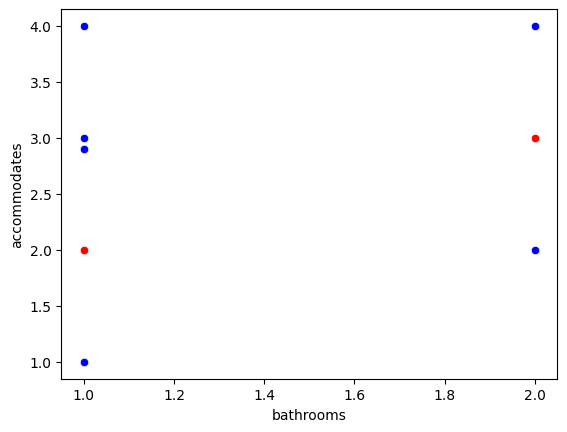

In [53]:
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df1)
sns.scatterplot(x='bathrooms', y=y_pred4, color="red", data=df1)

In [54]:
coef_Deter4= model4.score(X=X4, y=Y4)
coef_Deter4

0.12332670792489231

In [55]:
coef_Correl4= np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.3511790254626439)

In [56]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['review_scores_cleanliness'] != 'Nothing']
Y5= df1['price']
X5= df1['review_scores_cleanliness'].to_frame()

In [57]:
from sklearn.linear_model import LinearRegression
model5= LinearRegression()
type(model5)

sklearn.linear_model._base.LinearRegression

In [58]:
model5.fit(X=X5, y=Y5)

LinearRegression()

In [59]:
#Limpiar valores
import re
df1['review_scores_cleanliness']= df1['review_scores_cleanliness'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [60]:
#Predicciones
y_pred5= model5.predict(X=X5)
y_pred5

array([3125.96596093, 2829.27803154, 3014.70798741, 2884.9070183 ,
       3070.33697417, 3125.96596093, 1883.58525662, 2996.16499182,
       2903.45001389, 3125.96596093, 2940.53600506, 2458.41811981,
       2755.1060492 , 2959.07900065, 3125.96596093, 2328.6171507 ,
       2476.96111539, 2996.16499182, 2921.99300948, 2217.35917718,
       3125.96596093, 3125.96596093, 3125.96596093, 2643.84807567,
       3125.96596093, 3125.96596093, 3033.250983  , 2996.16499182,
       3125.96596093, 2940.53600506, 3125.96596093, 3125.96596093,
       3125.96596093, 2514.04710657, 3125.96596093, 3125.96596093,
       2421.33212863, 1271.66640226])

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

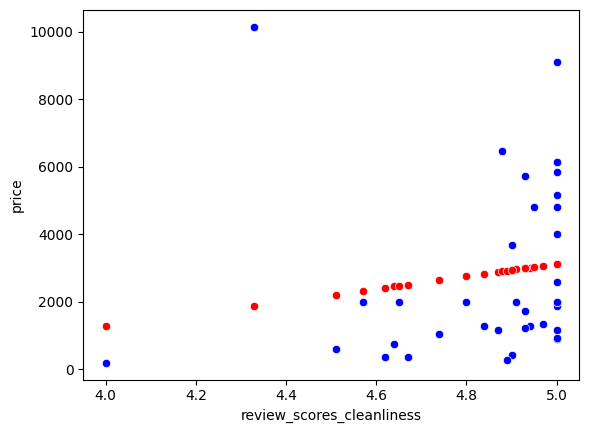

In [61]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df1)
sns.scatterplot(x='review_scores_cleanliness', y=y_pred5, color="red", data=df1)

In [62]:
coef_Deter5= model5.score(X=X5, y=Y5)
coef_Deter5

0.025651781187185252

In [63]:
coef_Correl5= np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.16016173446608667)

In [64]:
df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})

C:\Users\lapep\AppData\Local\Temp\ipykernel_21912\3355181784.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})


In [65]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_identity_verified'] != 'Nothing']
Y6= df1['price']
X6= df1['host_identity_verified'].to_frame()

In [66]:
from sklearn.linear_model import LinearRegression
model6= LinearRegression()
type(model6)

sklearn.linear_model._base.LinearRegression

In [67]:
model6.fit(X=X6, y=Y6)

LinearRegression()

In [68]:
#Predicciones
y_pred6= model6.predict(X=X6)
y_pred6

array([2851.23684211, 2851.23684211, 2851.23684211, 2851.23684211,
       2851.23684211, 2851.23684211, 2851.23684211, 2851.23684211,
       2851.23684211, 2851.23684211, 2851.23684211, 2851.23684211,
       2851.23684211, 2851.23684211, 2851.23684211, 2851.23684211,
       2851.23684211, 2851.23684211, 2851.23684211, 2851.23684211,
       2851.23684211, 2851.23684211, 2851.23684211, 2851.23684211,
       2851.23684211, 2851.23684211, 2851.23684211, 2851.23684211,
       2851.23684211, 2851.23684211, 2851.23684211, 2851.23684211,
       2851.23684211, 2851.23684211, 2851.23684211, 2851.23684211,
       2851.23684211, 2851.23684211])

<Axes: xlabel='host_identity_verified', ylabel='price'>

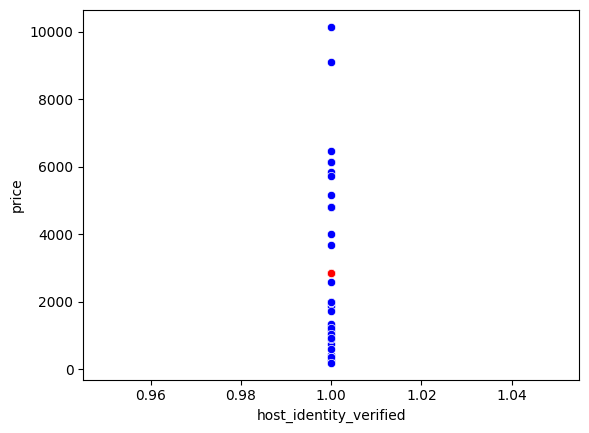

In [69]:
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df1)
sns.scatterplot(x='host_identity_verified', y=y_pred6, color="red", data=df1)

In [70]:
coef_Deter6= model6.score(X=X6, y=Y6)
coef_Deter6

0.0

In [71]:
coef_Correl6= np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.0)

In [72]:
df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})

C:\Users\lapep\AppData\Local\Temp\ipykernel_21912\1876949163.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})


In [73]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['instant_bookable'] != 'Nothing']
Y7= df1['price']
X7= df1['instant_bookable'].to_frame()

In [74]:
from sklearn.linear_model import LinearRegression
model7= LinearRegression()
type(model7)

sklearn.linear_model._base.LinearRegression

In [75]:
model7.fit(X=X7, y=Y7)

LinearRegression()

In [76]:
#Predicciones
y_pred7= model7.predict(X=X7)
y_pred7

array([3109.21428571, 3109.21428571, 3109.21428571, 3109.21428571,
       3109.21428571, 2128.9       , 3109.21428571, 3109.21428571,
       3109.21428571, 2128.9       , 2128.9       , 3109.21428571,
       3109.21428571, 2128.9       , 2128.9       , 3109.21428571,
       2128.9       , 2128.9       , 2128.9       , 2128.9       ,
       2128.9       , 3109.21428571, 3109.21428571, 3109.21428571,
       3109.21428571, 3109.21428571, 3109.21428571, 3109.21428571,
       3109.21428571, 3109.21428571, 3109.21428571, 3109.21428571,
       3109.21428571, 3109.21428571, 3109.21428571, 3109.21428571,
       3109.21428571, 3109.21428571])

<Axes: xlabel='instant_bookable', ylabel='price'>

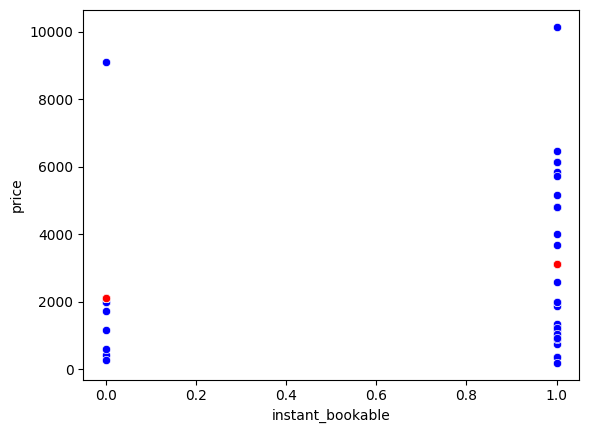

In [77]:
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df1)
sns.scatterplot(x='instant_bookable', y=y_pred7, color="red", data=df1)

In [78]:
coef_Deter7= model7.score(X=X7, y=Y7)
coef_Deter7

0.029819767920978624

In [79]:
coef_Correl7= np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.17268401176999168)

In [101]:
df1['property_type'] = df1['property_type'].replace({
    'Entire rental unit': 1,
    'Entire condo': 2,
    'Entire home': 3,
    'Entire loft': 4,
    'Houseboat': 5,
    'Entire townhouse': 6,
    'Entire serviced apartment': 7,
    'Boat': 8,
    'Entire guest suite': 9,
    'Entire guesthouse': 10,
    'Entire place': 11,
    'Entire villa': 12,
    'Room in aparthotel': 13,
    'Entire vacation home': 14,
    'Tiny home': 15,
    'Entire cabin': 16,
    'Casa particular': 17,
    'Entire cottage': 18,
    'Camper/RV': 19,
    'Barn': 20,
    'Entire chalet': 21,
    'Entire bungalow':22,
    'Earthen home':23,
    'Entire hostel':24,
    'Entire in-law':25,
    'Holiday park':26,
    'Campsite':27,
    'Castle':28,
    'Hut':29,
    'Entire home/apt':30,
    'Shipping container':31,
    'Dome':32,
    'Tent':33,
    'Tower':34,
    'Room in serviced apartment':35,
    'Room in bed and breakfast':36,
    'Room in boutique hotel':37,
    'Room in casa particular':38,
    'Room in hostel':39,
})

C:\Users\lapep\AppData\Local\Temp\ipykernel_21912\1441461460.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['property_type'] = df1['property_type'].replace({


In [102]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['property_type'] != 'Nothing']
Y8= df1['price']
X8= df1['property_type'].to_frame()

In [103]:
from sklearn.linear_model import LinearRegression
model8= LinearRegression()
type(model8)

sklearn.linear_model._base.LinearRegression

In [104]:
model8.fit(X=X8, y=Y8)

LinearRegression()

In [105]:
#Predicciones
y_pred8= model8.predict(X=X8)
y_pred8

array([2878.15950794, 2878.15950794, 2878.15950794, 2878.15950794,
       2878.15950794, 2878.15950794, 2951.23531522, 2878.15950794,
       2878.15950794, 2878.15950794, 2878.15950794, 1270.49174782,
       1270.49174782, 2878.15950794, 2878.15950794, 2878.15950794,
       2878.15950794, 2878.15950794, 2878.15950794, 2951.23531522,
       2878.15950794, 3024.3111225 , 2878.15950794, 2951.23531522,
       2951.23531522, 2951.23531522, 2951.23531522, 2951.23531522,
       2951.23531522, 2951.23531522, 3024.3111225 , 3024.3111225 ,
       3024.3111225 , 3097.38692978, 2951.23531522, 3024.3111225 ,
       3097.38692978, 3170.46273706])

<Axes: xlabel='property_type', ylabel='price'>

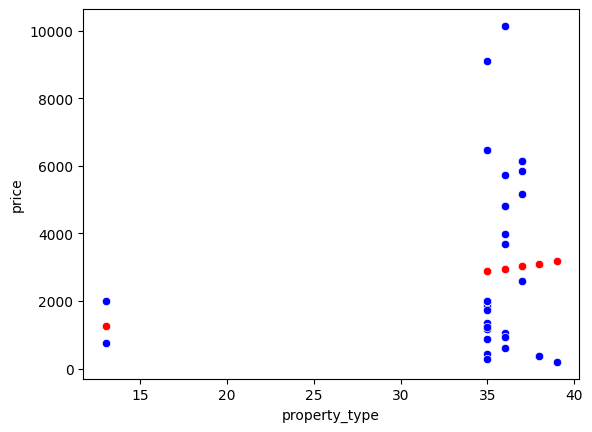

In [106]:
sns.scatterplot(x='property_type', y='price', color="blue", data=df1)
sns.scatterplot(x='property_type', y=y_pred8, color="red", data=df1)

In [107]:
coef_Deter8= model8.score(X=X8, y=Y8)
coef_Deter8

0.02309138984628023

In [108]:
coef_Correl8= np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.15195851356959317)

In [109]:
#Declaramos las variables dependientes e independientes para la regresión lineal 
Vars_Indep = df1[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate',
    'host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']]
Var_Dep = df1[['price']]

In [110]:
#Declaramos las variables dependientes e independientes para la regresión lineal accommodates vs bathrooms
Vars_Indep2= df1 [['bathrooms']]
Var_Dep2 = df1[['accommodates']]

In [111]:
from sklearn.linear_model import LinearRegression
model9 = LinearRegression()
model10= LinearRegression()
type(model9)
type(model10)

sklearn.linear_model._base.LinearRegression

In [112]:
model9.fit(X=Vars_Indep, y=Var_Dep)
model10.fit(X=Vars_Indep2, y=Var_Dep2)

LinearRegression()

In [113]:
model9.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type', 'review_scores_cleanliness', 'host_acceptance_rate',
        'host_identity_verified', 'host_is_superhost', 'instant_bookable',
        'property_type'], dtype=object),
 'n_features_in_': 7,
 'coef_': array([[ 0.00000000e+00,  2.58034142e+03, -6.69632142e+01,
         -4.40536496e-13, -7.25119295e+02,  1.01274486e+03,
          5.07325153e+01]]),
 'rank_': 5,
 'singular_': array([1.03558955e+02, 3.19659871e+01, 3.21483268e+00, 2.32215333e+00,
        1.29754503e+00, 5.17517522e-16, 0.00000000e+00]),
 'intercept_': array([-5692.48402035])}

In [114]:
model10.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[1.00555556]]),
 'rank_': 1,
 'singular_': array([1.3764944]),
 'intercept_': array([0.98888889])}

In [115]:
y_pred= model9.predict(X=df1[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate','host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']])
y_pred

array([[3044.90773561],
       [2899.90596592],
       [3883.05940259],
       [3702.43550351],
       [3960.46964505],
       [2422.4661017 ],
       [6243.65007784],
       [3388.51348907],
       [2400.45069478],
       [6909.0014528 ],
       [1305.38623664],
       [1256.24628483],
       [1010.94483037],
       [1532.07929338],
       [1563.42037818],
       [1533.5816418 ],
       [ 861.19052537],
       [2107.91577423],
       [1279.58282249],
       [1543.64739444],
       [1764.31002077],
       [3402.749562  ],
       [3301.28453136],
       [3149.87077804],
       [3352.01704668],
       [3352.01704668],
       [3222.99997591],
       [3171.3931476 ],
       [3352.01704668],
       [3093.98290514],
       [3402.749562  ],
       [3402.749562  ],
       [3402.749562  ],
       [1943.8133293 ],
       [6700.17775645],
       [2677.63026687],
       [1814.79625853],
       [ 990.83639141]])

In [116]:
# Lista de columnas a conservar
columnas_a_conservar = [
    "price", "room_type", "review_scores_cleanliness", "host_acceptance_rate",
    "host_identity_verified", "host_is_superhost", "instant_bookable",
    "accommodates", "bathrooms", "property_type"
]

# Filtrar el DataFrame para conservar solo esas columnas
df1= df1[columnas_a_conservar]

In [117]:
#insertamos la columna de predicciones en el DataFrame 
df1.insert(0, 'Predicciones', y_pred)
df1

,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
100,3044.907736,1872.0,4,5.00,93.0,1,1,1,3.0,1,35
135,2899.905966,1275.0,4,4.84,89.0,1,1,1,2.0,1,35
158,3883.059403,1275.0,4,4.94,89.0,1,0,1,2.0,1,35
159,3702.435504,1159.0,4,4.87,89.0,1,0,1,2.0,1,35
170,3960.469645,1353.0,4,4.97,89.0,1,0,1,2.0,1,35
214,2422.466102,1159.0,4,5.00,98.0,1,0,0,4.0,1,35
403,6243.650078,10144.0,4,4.33,31.0,1,0,1,2.9,1,36
718,3388.513489,1219.0,4,4.93,96.0,1,0,1,2.0,1,35
940,2400.450695,6473.0,4,4.88,98.0,1,1,1,4.0,2,35
954,6909.001453,9109.0,4,5.00,31.0,1,0,0,2.9,1,35


In [118]:
y_pred2= model10.predict(X=df1[['bathrooms']])
y_pred2

array([[1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [3.        ],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [3.        ],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444],
       [1.99444444]])

In [119]:
df1.insert(1, 'Predicciones2', y_pred2)
df1

,Predicciones,Predicciones2,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
100,3044.907736,1.994444,1872.0,4,5.00,93.0,1,1,1,3.0,1,35
135,2899.905966,1.994444,1275.0,4,4.84,89.0,1,1,1,2.0,1,35
158,3883.059403,1.994444,1275.0,4,4.94,89.0,1,0,1,2.0,1,35
159,3702.435504,1.994444,1159.0,4,4.87,89.0,1,0,1,2.0,1,35
170,3960.469645,1.994444,1353.0,4,4.97,89.0,1,0,1,2.0,1,35
214,2422.466102,1.994444,1159.0,4,5.00,98.0,1,0,0,4.0,1,35
403,6243.650078,1.994444,10144.0,4,4.33,31.0,1,0,1,2.9,1,36
718,3388.513489,1.994444,1219.0,4,4.93,96.0,1,0,1,2.0,1,35
940,2400.450695,3.000000,6473.0,4,4.88,98.0,1,1,1,4.0,2,35
954,6909.001453,1.994444,9109.0,4,5.00,31.0,1,0,0,2.9,1,35


In [120]:
coef_Deter9= model9.score(X=Vars_Indep, y=Var_Dep)
coef_Deter9

0.32763461002596916

In [121]:
coef_Correl9=np.sqrt(coef_Deter9)
coef_Correl9

np.float64(0.5723937543561854)

In [122]:
coef_Deter10= model10.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter10

0.12332670792489231

In [123]:
coef_Correl10=np.sqrt(coef_Deter10)
coef_Correl10

np.float64(0.3511790254626439)

In [124]:
df1['predicted_price'] = model9.predict(df1[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate','host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']])
df1['predicted_accommodates'] = model10.predict(df1[['bathrooms']])

In [125]:
df1= df1.drop(['room_type'], axis=1)

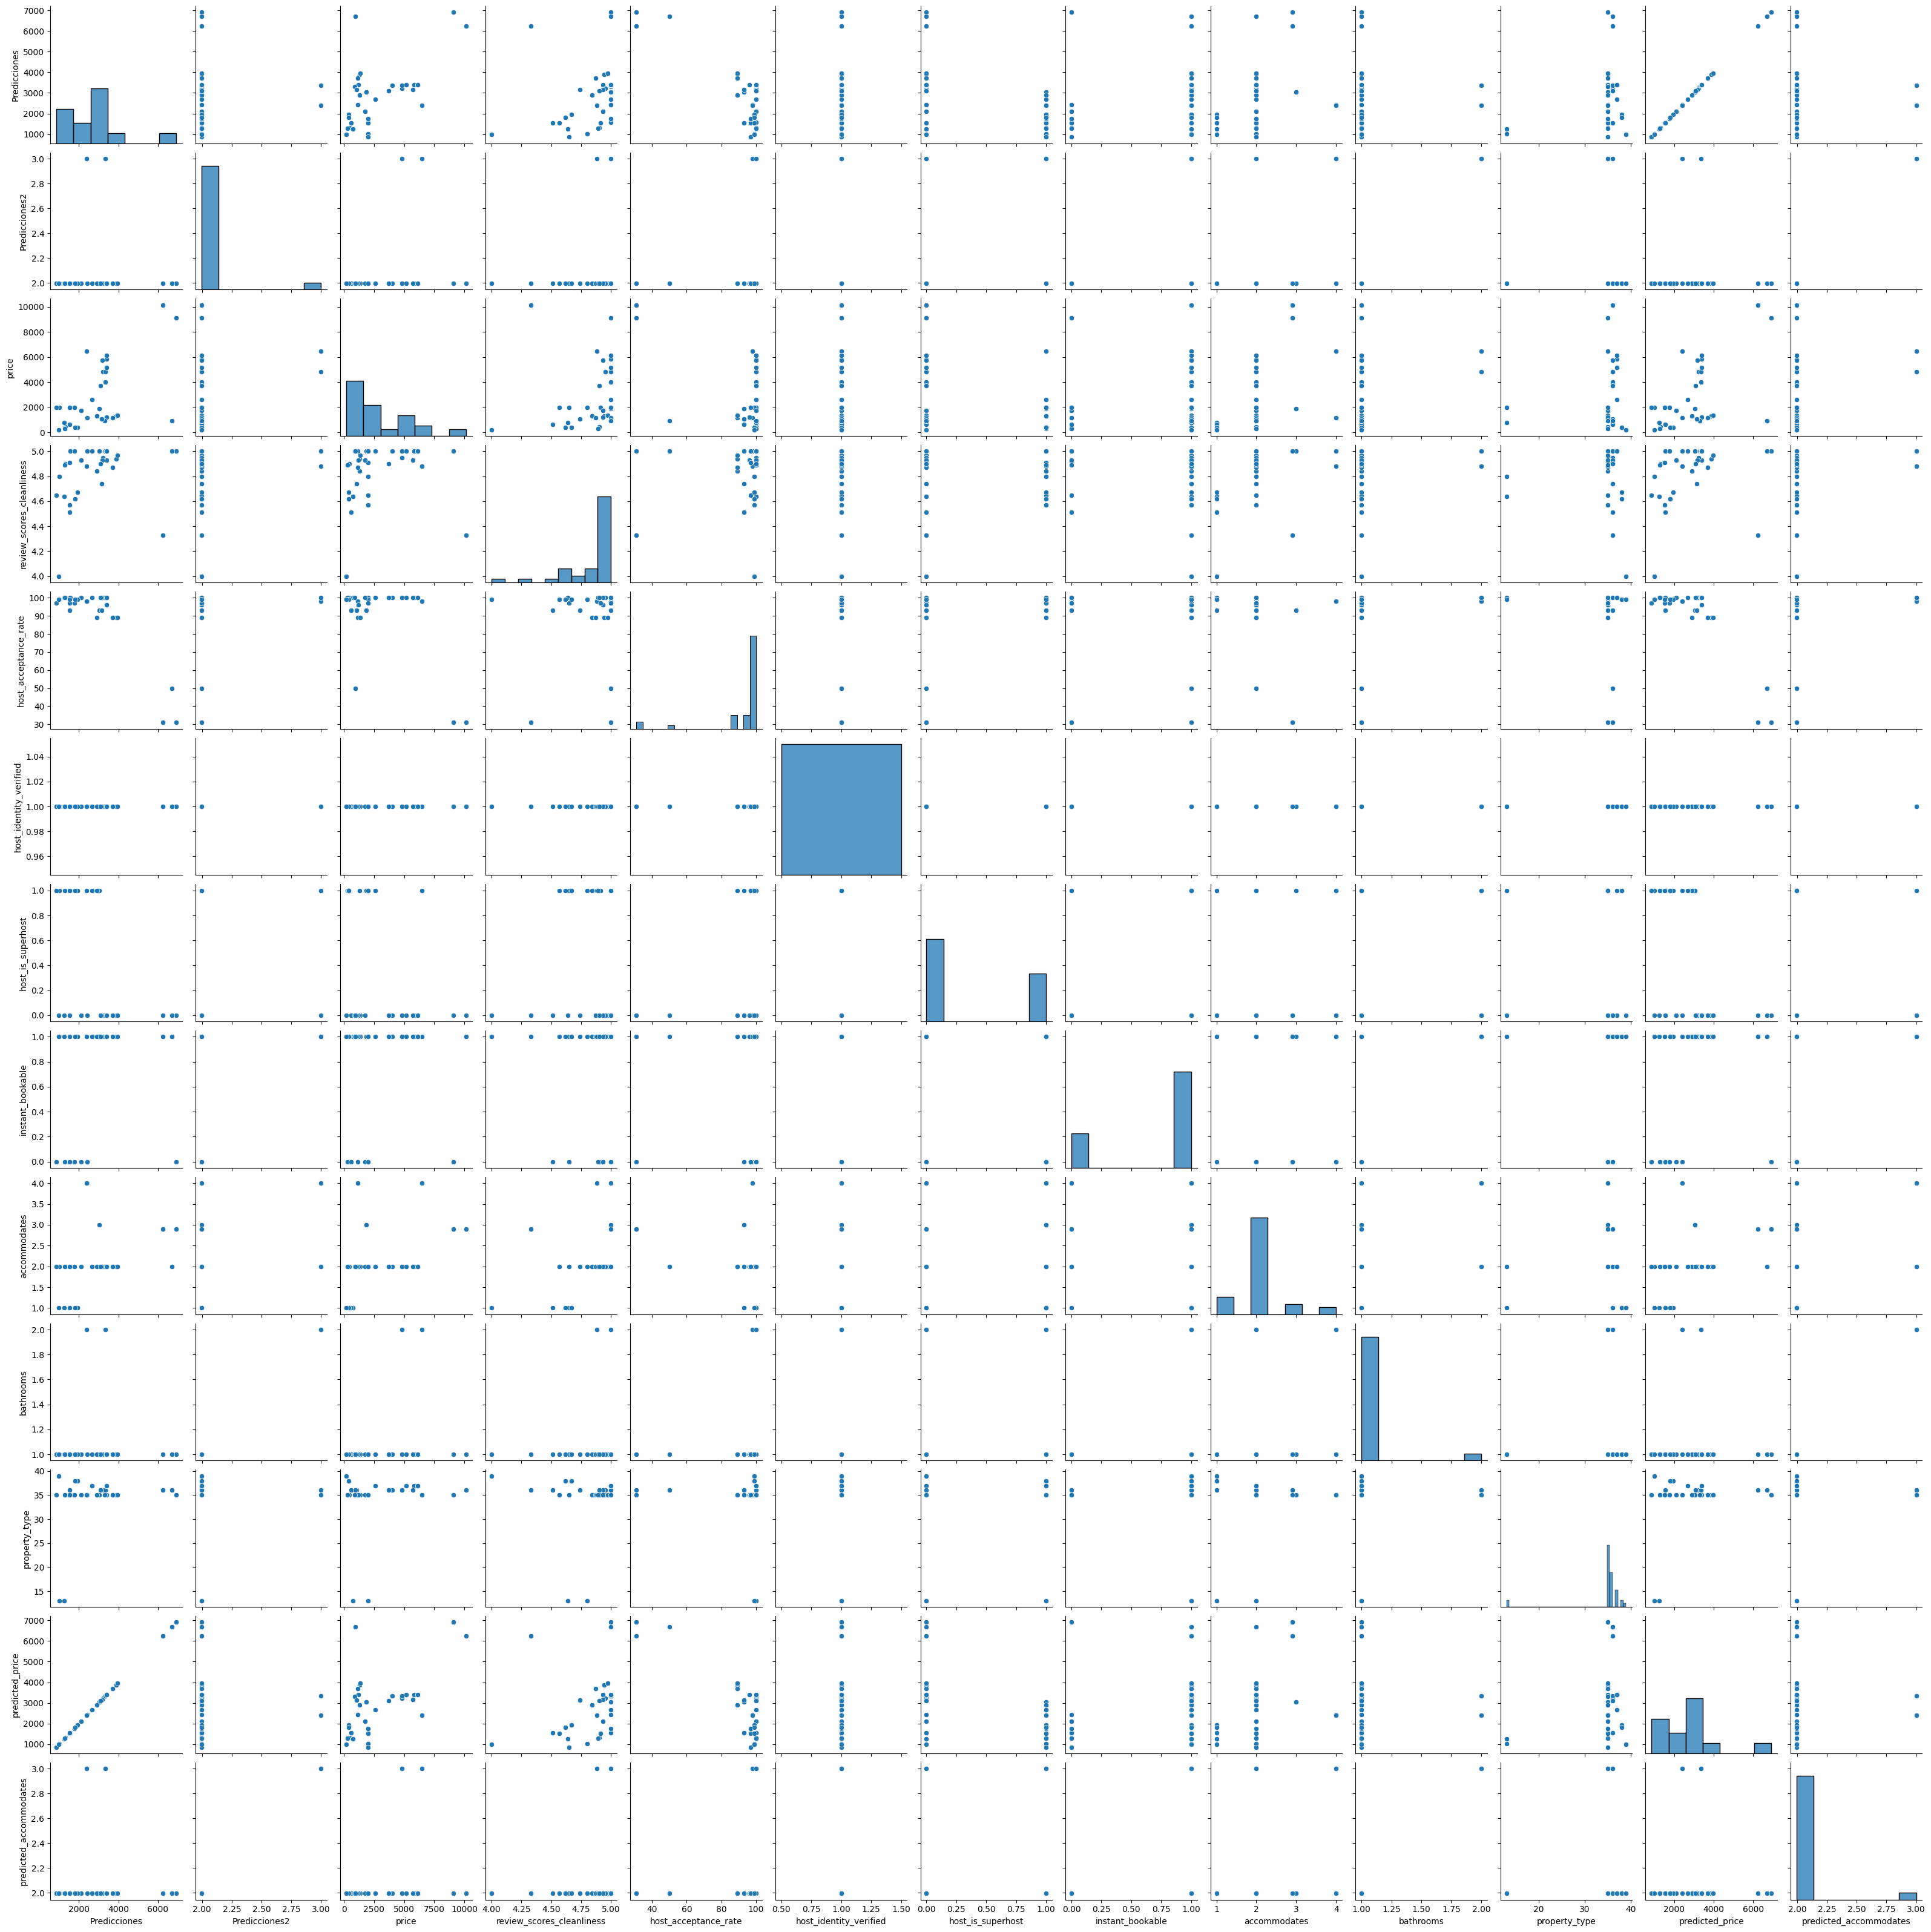

In [126]:
sns.pairplot(df1)

In [127]:
Corr_Factors9= df1.corr()
Corr_Factors9

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,0.004118,0.572394,0.279810,-0.782398,NaN,-0.544649,0.301687,0.340757,0.004118,0.265479,1.000000,0.004118
Predicciones2,0.004118,1.000000,0.263229,0.096236,0.087528,NaN,0.064293,0.140859,0.351179,1.000000,0.039376,0.004118,1.000000
price,0.572394,0.263229,1.000000,0.160162,-0.447840,NaN,-0.311754,0.172684,0.445125,0.263229,0.151959,0.572394,0.263229
review_scores_cleanliness,0.279810,0.096236,0.160162,1.000000,0.138580,NaN,-0.049469,-0.075167,0.378130,0.096236,0.058047,0.279810,0.096236
host_acceptance_rate,-0.782398,0.087528,-0.447840,0.138580,1.000000,NaN,0.221906,0.052063,-0.284696,0.087528,-0.067011,-0.782398,0.087528
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_is_superhost,-0.544649,0.064293,-0.311754,-0.049469,0.221906,NaN,1.000000,-0.286902,0.028741,0.064293,-0.092795,-0.544649,0.064293
instant_bookable,0.301687,0.140859,0.172684,-0.075167,0.052063,NaN,-0.286902,1.000000,-0.133314,0.140859,-0.053851,0.301687,0.140859
accommodates,0.340757,0.351179,0.445125,0.378130,-0.284696,NaN,0.028741,-0.133314,1.000000,0.351179,0.099471,0.340757,0.351179
bathrooms,0.004118,1.000000,0.263229,0.096236,0.087528,NaN,0.064293,0.140859,0.351179,1.000000,0.039376,0.004118,1.000000


In [128]:
Corr_Factors10= abs(Corr_Factors9)
Corr_Factors10

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,0.004118,0.572394,0.279810,0.782398,NaN,0.544649,0.301687,0.340757,0.004118,0.265479,1.000000,0.004118
Predicciones2,0.004118,1.000000,0.263229,0.096236,0.087528,NaN,0.064293,0.140859,0.351179,1.000000,0.039376,0.004118,1.000000
price,0.572394,0.263229,1.000000,0.160162,0.447840,NaN,0.311754,0.172684,0.445125,0.263229,0.151959,0.572394,0.263229
review_scores_cleanliness,0.279810,0.096236,0.160162,1.000000,0.138580,NaN,0.049469,0.075167,0.378130,0.096236,0.058047,0.279810,0.096236
host_acceptance_rate,0.782398,0.087528,0.447840,0.138580,1.000000,NaN,0.221906,0.052063,0.284696,0.087528,0.067011,0.782398,0.087528
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_is_superhost,0.544649,0.064293,0.311754,0.049469,0.221906,NaN,1.000000,0.286902,0.028741,0.064293,0.092795,0.544649,0.064293
instant_bookable,0.301687,0.140859,0.172684,0.075167,0.052063,NaN,0.286902,1.000000,0.133314,0.140859,0.053851,0.301687,0.140859
accommodates,0.340757,0.351179,0.445125,0.378130,0.284696,NaN,0.028741,0.133314,1.000000,0.351179,0.099471,0.340757,0.351179
bathrooms,0.004118,1.000000,0.263229,0.096236,0.087528,NaN,0.064293,0.140859,0.351179,1.000000,0.039376,0.004118,1.000000


<Axes: >

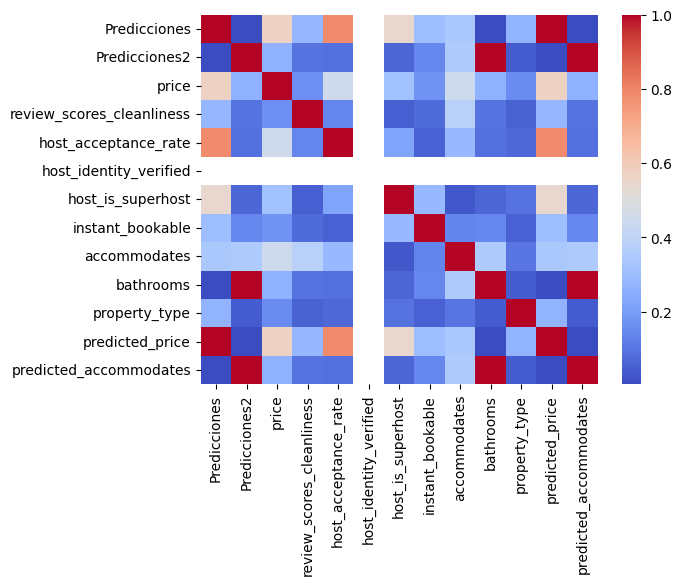

In [129]:
Heart_Nap = sns.heatmap(Corr_Factors10, cmap= 'coolwarm')
Heart_Nap

<Axes: >

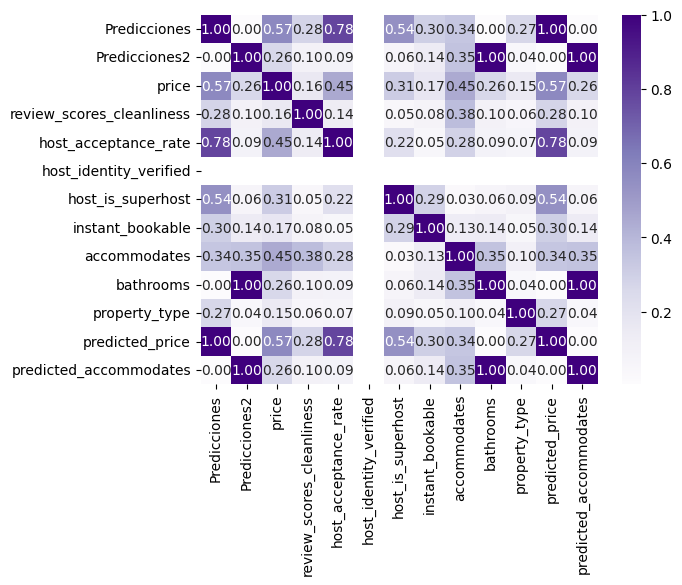

In [130]:
Heart_Nap = sns.heatmap(Corr_Factors10, cmap= 'Purples', annot=True, fmt=".2f")
Heart_Nap

In [131]:
Corr_Factors11 = df1.corr()
Corr_Factors11

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,0.004118,0.572394,0.279810,-0.782398,NaN,-0.544649,0.301687,0.340757,0.004118,0.265479,1.000000,0.004118
Predicciones2,0.004118,1.000000,0.263229,0.096236,0.087528,NaN,0.064293,0.140859,0.351179,1.000000,0.039376,0.004118,1.000000
price,0.572394,0.263229,1.000000,0.160162,-0.447840,NaN,-0.311754,0.172684,0.445125,0.263229,0.151959,0.572394,0.263229
review_scores_cleanliness,0.279810,0.096236,0.160162,1.000000,0.138580,NaN,-0.049469,-0.075167,0.378130,0.096236,0.058047,0.279810,0.096236
host_acceptance_rate,-0.782398,0.087528,-0.447840,0.138580,1.000000,NaN,0.221906,0.052063,-0.284696,0.087528,-0.067011,-0.782398,0.087528
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_is_superhost,-0.544649,0.064293,-0.311754,-0.049469,0.221906,NaN,1.000000,-0.286902,0.028741,0.064293,-0.092795,-0.544649,0.064293
instant_bookable,0.301687,0.140859,0.172684,-0.075167,0.052063,NaN,-0.286902,1.000000,-0.133314,0.140859,-0.053851,0.301687,0.140859
accommodates,0.340757,0.351179,0.445125,0.378130,-0.284696,NaN,0.028741,-0.133314,1.000000,0.351179,0.099471,0.340757,0.351179
bathrooms,0.004118,1.000000,0.263229,0.096236,0.087528,NaN,0.064293,0.140859,0.351179,1.000000,0.039376,0.004118,1.000000


In [132]:
Corr_Factors11= abs(Corr_Factors9)
Corr_Factors11

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,0.004118,0.572394,0.279810,0.782398,NaN,0.544649,0.301687,0.340757,0.004118,0.265479,1.000000,0.004118
Predicciones2,0.004118,1.000000,0.263229,0.096236,0.087528,NaN,0.064293,0.140859,0.351179,1.000000,0.039376,0.004118,1.000000
price,0.572394,0.263229,1.000000,0.160162,0.447840,NaN,0.311754,0.172684,0.445125,0.263229,0.151959,0.572394,0.263229
review_scores_cleanliness,0.279810,0.096236,0.160162,1.000000,0.138580,NaN,0.049469,0.075167,0.378130,0.096236,0.058047,0.279810,0.096236
host_acceptance_rate,0.782398,0.087528,0.447840,0.138580,1.000000,NaN,0.221906,0.052063,0.284696,0.087528,0.067011,0.782398,0.087528
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_is_superhost,0.544649,0.064293,0.311754,0.049469,0.221906,NaN,1.000000,0.286902,0.028741,0.064293,0.092795,0.544649,0.064293
instant_bookable,0.301687,0.140859,0.172684,0.075167,0.052063,NaN,0.286902,1.000000,0.133314,0.140859,0.053851,0.301687,0.140859
accommodates,0.340757,0.351179,0.445125,0.378130,0.284696,NaN,0.028741,0.133314,1.000000,0.351179,0.099471,0.340757,0.351179
bathrooms,0.004118,1.000000,0.263229,0.096236,0.087528,NaN,0.064293,0.140859,0.351179,1.000000,0.039376,0.004118,1.000000


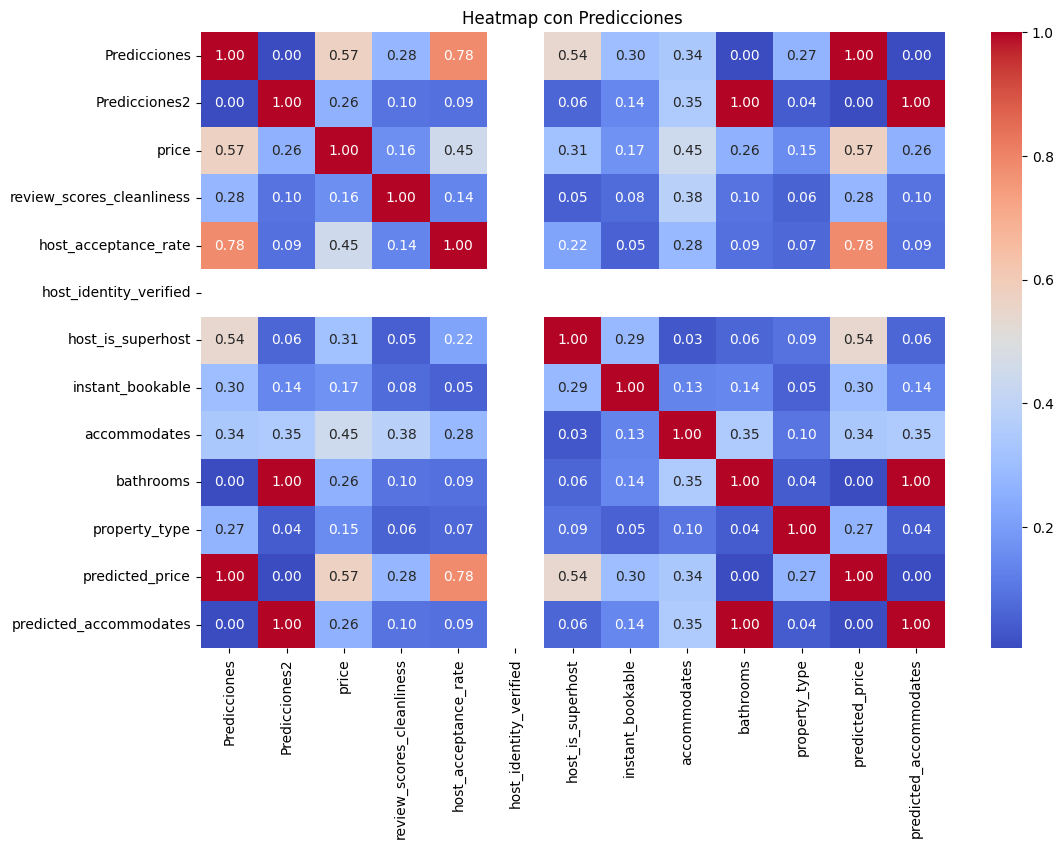

In [133]:
plt.figure(figsize=(12,8))
sns.heatmap(Corr_Factors11, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Heatmap con Predicciones")
plt.show()